In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("/gdrive/My Drive/ML:March2020/data/online_shoppers_intention.csv")
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.shape

(12330, 18)

In [5]:
from sklearn.preprocessing import LabelEncoder

month_labelencoder=LabelEncoder()
data["Month"]=month_labelencoder.fit_transform(data["Month"])

visitor_labelencoder=LabelEncoder()
data["VisitorType"]=visitor_labelencoder.fit_transform(data["VisitorType"])

weekend_labelencoder=LabelEncoder()
data["Weekend"]=weekend_labelencoder.fit_transform(data["Weekend"])

revenue_labelencoder=LabelEncoder()
data["Revenue"]=revenue_labelencoder.fit_transform(data["Revenue"])

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [6]:
Xcol=data.drop(columns=["Revenue"])
Ycol=data["Revenue"]
Xcol

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0


In [7]:
X=np.array(Xcol)
Y=np.array(Ycol)
Y=np.reshape(Y,(-1,1))
X.shape,Y.shape

((12330, 17), (12330, 1))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.25,random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9247, 17), (3083, 17), (9247, 1), (3083, 1))

# Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  StratifiedKFold

In [10]:
fold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
fold.get_n_splits(X_train,Y_train)

5

In [11]:
parameters={"solver":("newton-cg","liblinear"),"C":[1,10,15,20]}
model=LogisticRegression(penalty="l2",n_jobs=-2,max_iter=1000)
log_reg=GridSearchCV(model,parameters,n_jobs=-2,cv=fold)
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [1, 10, 15, 20],
                         'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print(log_reg.best_params_)

{'C': 20, 'solver': 'newton-cg'}


In [13]:
yt_pred__log_reg=log_reg.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,yt_pred__log_reg))
ac=accuracy_score(Y_test,yt_pred__log_reg)
print("test accuracy = {} %",format(ac*100))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2636
           1       0.72      0.38      0.49       447

    accuracy                           0.89      3083
   macro avg       0.81      0.68      0.72      3083
weighted avg       0.88      0.89      0.87      3083

test accuracy = {} % 88.84203697697049


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score,make_scorer
f_scorer = make_scorer(fbeta_score,beta=1,pos_label=1)
params={"n_neighbors":[1,2,100,10,5,6]}
KNN=KNeighborsClassifier(algorithm="brute")
Knn_grid= GridSearchCV(KNN,params,n_jobs=-2,cv=fold,scoring=f_scorer,verbose=True)
Knn_grid.fit(X_train,Y_train)

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 100, 10, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1, pos_label=1),
             verbose=True)

In [15]:
print(Knn_grid.best_params_)

{'n_neighbors': 1}


In [16]:
yt_pred__Knn=Knn_grid.predict(X_test)
print(classification_report(Y_test,yt_pred__Knn))
ac_knn=accuracy_score(Y_test,yt_pred__Knn)
print("test accuracy = {} %",format(ac_knn*100))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2636
           1       0.41      0.41      0.41       447

    accuracy                           0.83      3083
   macro avg       0.66      0.65      0.65      3083
weighted avg       0.83      0.83      0.83      3083

test accuracy = {} % 82.90626013623094


# Naive bayes

In [17]:
from sklearn.naive_bayes import ComplementNB
NB_comp=ComplementNB()
NB_comp.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [18]:
y_pred_NB_comp= NB_comp.predict(X_test)
print(classification_report(Y_test, y_pred_NB_comp))
ac_NB=accuracy_score(Y_test,y_pred_NB_comp)
print("test accuracy = {} %",format(ac_NB*100))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2636
           1       0.59      0.64      0.61       447

    accuracy                           0.88      3083
   macro avg       0.76      0.78      0.77      3083
weighted avg       0.89      0.88      0.88      3083

test accuracy = {} % 88.19331819656179


# Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred_dtree= dtree.predict(X_test)
print(classification_report(Y_test, y_pred_dtree))
ac_dtree=accuracy_score(Y_test,y_pred_dtree)
print("test accuracy = {} %",format(ac_dtree*100))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2636
           1       0.54      0.54      0.54       447

    accuracy                           0.87      3083
   macro avg       0.73      0.73      0.73      3083
weighted avg       0.87      0.87      0.87      3083

test accuracy = {} % 86.63639312358093


In [21]:
prune_path = dtree.cost_complexity_pruning_path(X_train, Y_train)
alphas = prune_path.ccp_alphas
impurities = prune_path.impurities

new_dTrees = []
i=0

for alpha in alphas:
    new_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_dTree.fit(X_train, Y_train)
    
    new_dTrees.append(new_dTree)

In [22]:
test_scores = [new_dTree.score(X_test, Y_test) for new_dTree in new_dTrees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])
pruned_dTree.fit(X_train, Y_train)
ytpred_dTree = pruned_dTree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, ytpred_dTree))
ac_pdtree=accuracy_score(Y_test,ytpred_dTree)
print("test accuracy = {} %",format(ac_pdtree*100))

max f1 test_score = 0.9062601362309439
position of max f1 = 303
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2636
           1       0.74      0.54      0.63       447

    accuracy                           0.91      3083
   macro avg       0.83      0.75      0.79      3083
weighted avg       0.90      0.91      0.90      3083

test accuracy = {} % 90.59357768407395


# ROC & AUC

In [23]:
logreg_probs = log_reg.predict_proba(X_test)
Knn_grid_probs = Knn_grid.predict_proba(X_test)
NB_comp_probs = NB_comp.predict_log_proba(X_test)
Dtree_probs = pruned_dTree.predict_proba(X_test)

In [24]:
logreg_probs = logreg_probs[:, 1]
Knn_grid_probs = Knn_grid_probs[:, 1]
NB_comp_probs = NB_comp_probs[:, 1]
Dtree_probs = Dtree_probs[:, 1]

In [25]:
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(Y_test, logreg_probs)
Knn_grid_auc = roc_auc_score(Y_test, Knn_grid_probs)
NB_comp_auc = roc_auc_score(Y_test, NB_comp_probs)
Dtree_auc = roc_auc_score(Y_test, Dtree_probs)
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))
print('NB: ROC AUC= {} %'.format(round(NB_comp_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 88.8 %
KNN: ROC AUC= 65.5 %
NB: ROC AUC= 75.0 %
DTree: ROC AUC= 90.9 %


In [26]:
from sklearn.metrics import roc_curve
logreg_fpr, logreg_tpr, lr_thres = roc_curve(Y_test, logreg_probs)
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(Y_test, Knn_grid_probs)
NB_fpr, NB_tpr, NB_thres = roc_curve(Y_test, NB_comp_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(Y_test, Dtree_probs)

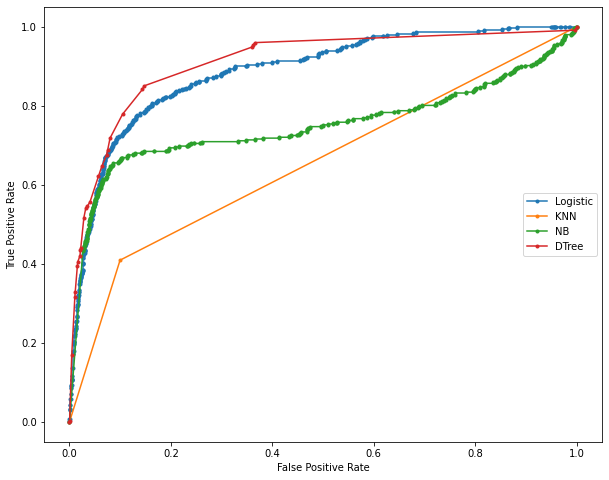

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred_RF= rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2636
           1       0.72      0.57      0.64       447

    accuracy                           0.91      3083
   macro avg       0.83      0.77      0.79      3083
weighted avg       0.90      0.91      0.90      3083



In [30]:
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(Y_test, rf_probs)

print('Random Forest: ROC AUC= {} %'.format(round(rf_auc, 3)*100))

Random Forest: ROC AUC= 93.10000000000001 %


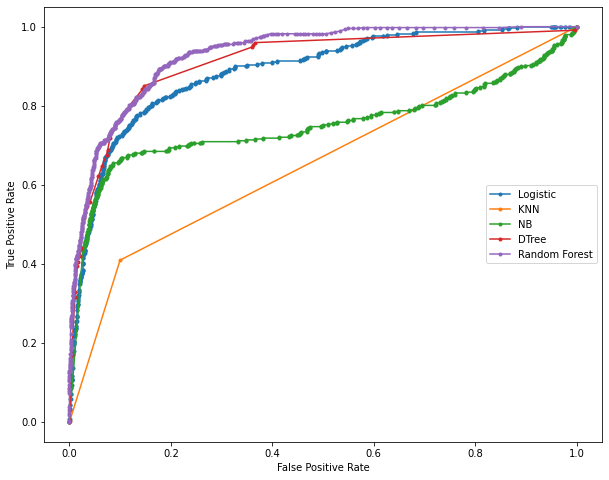

In [31]:
rf_fpr, rf_tpr, rf_thres = roc_curve(Y_test, rf_probs)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

In [32]:
from sklearn.preprocessing import OneHotEncoder
x_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, Y_train, test_size=0.60, shuffle = True)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
rf_enc = OneHotEncoder()
rf_enc.fit(rf.apply(x_train))
rf_enc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [33]:
f = rf_enc.transform(rf.apply(X_train_lr))
f.shape

(5549, 304273)

In [34]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_train_lr, y_train_lr)

parameters = {'solver':('liblinear', 'sag'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
rf_lr = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)


rf_lr.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

print(rf_lr.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.001, 'solver': 'liblinear'}


In [35]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(X_test)))
yprobs_rf_lr= yprobs_rf_lr[:, 1]

In [36]:
rf_lr_auc = roc_auc_score(Y_test, yprobs_rf_lr)
print('Logistic and Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))

Logistic and Random Forest: ROC AUC= 93.30000000000001 %


In [37]:
fpr_rf_lr, tpr_rf_lr, thres_rf_lr = roc_curve(Y_test, yprobs_rf_lr)

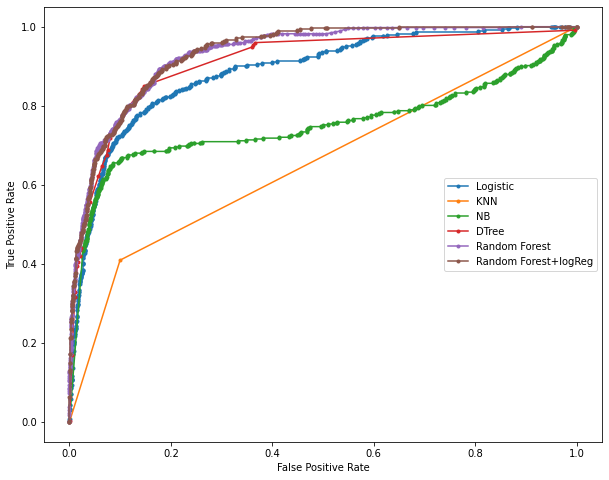

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()